In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from sklearn import feature_extraction, tree, model_selection, metrics
import matplotlib.pyplot as plt
import matplotlib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score

In [2]:
df = pd.read_csv('VirusSample.csv') 
df.head(3)

,file,api,class
0,7ff49f2f0912352416b05c010f35f402cc79feed,"IntersectRect,GetCurrentProcess,GetVersion",Virus
1,50cc6c99ec285d0db45dde07d8fdc18d9098c5b6,"GetCaretBlinkTime,CountClipboardFormats,GetCon...",Virus
2,f77c6bd4aebacd1a01d02e0cb20642ebf2d32929,"VarR8Pow,GetClipboardViewer,GetInputDesktop,Ge...",Virus


In [3]:
df["class"].value_counts()

Trojan        6153
Virus         2367
Backdoor       447
Worms          441
Adware         222
Agent          102
Downloader      31
Spyware         11
Ransomware      10
Riskware         4
Dropper          4
Crypt            2
Keylogger        1
Name: class, dtype: int64

<Axes: >

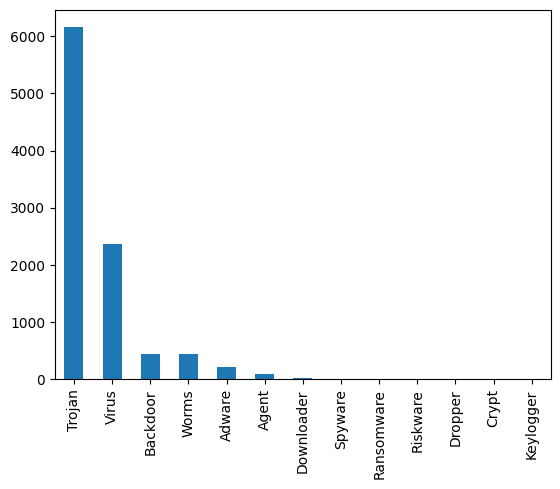

In [4]:
df["class"].value_counts().plot(kind='bar')

In [5]:
df["api"].apply(lambda x: ' '.join(x.split(",")))

0              IntersectRect GetCurrentProcess GetVersion
1       GetCaretBlinkTime CountClipboardFormats GetCon...
2       VarR8Pow GetClipboardViewer GetInputDesktop Ge...
3       SetTraceCallback CopyAcceleratorTableW GetProc...
4       SHLoadNonloadedIconOverlayIdentifiers VarUI8Fr...
                              ...                        
9790    NtResetWriteWatch GetClipboardViewer GetConsol...
9791    RtlpNtEnumerateSubKey NtFlushWriteBuffer ReadC...
9792    ZwNotifyChangeDirectoryFile GetCursor GetConso...
9793    ILSaveToStream OleQueryLinkFromData VarUdateFr...
9794    SwitchToFiber GetUserDefaultLCID GetCurrentThr...
Name: api, Length: 9795, dtype: object

In [6]:
clf = RandomForestClassifier(max_depth=12, random_state=42, n_estimators = 200)
y = df["class"]
x = df['api']
tv = TfidfVectorizer(min_df=0.15, max_df=0.8, use_idf=True, ngram_range=(1,10))
tv_matrix = tv.fit_transform(df["api"])
tv_matrix_array = tv_matrix.toarray()
vocabulary = tv.get_feature_names_out()
X = pd.DataFrame(tv_matrix_array, columns=vocabulary)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf.fit(X_train, y_train)
y_preds= clf.predict(X_test)
cv = KFold(n_splits=10)
cross_val_score(clf, X, y, cv=cv)

array([0.88979592, 0.85816327, 0.94081633, 0.71428571, 0.85306122,
       0.84882533, 0.85597549, 0.85801839, 0.83350358, 0.72625128])

In [7]:
X

,atoi,closehandle,copyfilea,createfilea,deletecriticalsection,entercriticalsection,exitprocess,freelibrary,getcommandlinea,getcurrentprocessid,...,terminateprocess,tlsgetvalue,virtualalloc,virtualalloc virtualfree,virtualfree,virtualprotect,waitforsingleobject,widechartomultibyte,writefile,wsprintfa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[  42,    0,    0,    0,    0,    0,    0,   22,    2,    0],
       [   0,    4,    0,    0,    0,    0,    0,   26,    1,    0],
       [   0,    0,  115,    0,    0,    0,    0,   15,    1,    0],
       [   0,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   3,    0,    0,    0,    1,    0,    0,    6,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    2,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   2,    0,    0,    0,    1,    0,    0, 1595,  251,    5],
       [   0,    0,    0,    0,    1,    0,    0,   28,  681,    1],
       [   6,    0,    0,    0,    0,    0,    0,   27,   37,   62]])

In [9]:
print('\nAccuracy:\t', accuracy_score(y_test, y_preds))
print('Precision:\t', precision_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds)))
print('Recall:\t\t', recall_score(y_test, y_preds, average='weighted'))
print('F1:\t\t', f1_score(y_test, y_preds, average='weighted'))


Accuracy:	 0.8506294658046955
Precision:	 0.8694661755715374
Recall:		 0.8506294658046955
F1:		 0.8465444894456525


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train = pd.DataFrame(X_train, columns=X_train.columns)
X_train = X_train.apply(pd.to_numeric)
X_test = pd.DataFrame(X_test, columns=X_train.columns)
X_test = X_test.apply(pd.to_numeric)

#Se transforman las colunas usando los preprocesadores
numeric_preprocessor = Pipeline(
steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

preprocesador = ColumnTransformer([
('numerico', numeric_preprocessor, [0,-1])
],remainder="passthrough")

model = make_pipeline(preprocesador, SVC(kernel="linear", C=32, degree=4))
model = model.fit(X_train, y_train)
y_preds = model.predict(X_test)
#scores = cross_val_score(model, y_test, y_preds, cv=10)

In [11]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[  41,    0,    0,    0,    0,    0,    0,    0,   23,    2,    0],
       [   0,    4,    0,    0,    0,    0,    0,    0,   26,    1,    0],
       [   1,    0,  115,    0,    0,    0,    0,    0,   14,    0,    1],
       [   1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   4,    1,    0,    0,    1,    0,    0,    0,    3,    0,    1],
       [   0,    0,    0,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   9,    2,    1,    0,    1,    0,    0,    2, 1583,  252,    4],
       [   3,    0,    1,    0,    0,    0,    0,    1,   37,  666,    3],
       [   6,    0,    0,    0,    0,    0,    0,    0,   31,   37,   58]])

In [12]:
print('\nAccuracy:\t', accuracy_score(y_test, y_preds))
print('Precision:\t', precision_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds)))
print('Recall:\t\t', recall_score(y_test, y_preds, average='weighted'))
print('F1:\t\t', f1_score(y_test, y_preds, average='weighted'))


Accuracy:	 0.8397414086423953
Precision:	 0.8548483065335608
Recall:		 0.8397414086423953
F1:		 0.8364037054361583


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
